<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha_2211566_Assignment_3_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-means cluster to breast cancer

This code specifies the characteristics that affect the recognition of cancer and draws these characteristics by scatter

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import cluster

In [2]:
# read file
data=pd.read_csv('/content/datar2.csv')
print('the values',data.columns.values)
data.head()

the values ['age' 'bmi' 'glucose' 'insulin' 'homa' 'leptin' 'adiponectin' 'resistin'
 'mcp_1' 'classification']


,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
import seaborn as sns

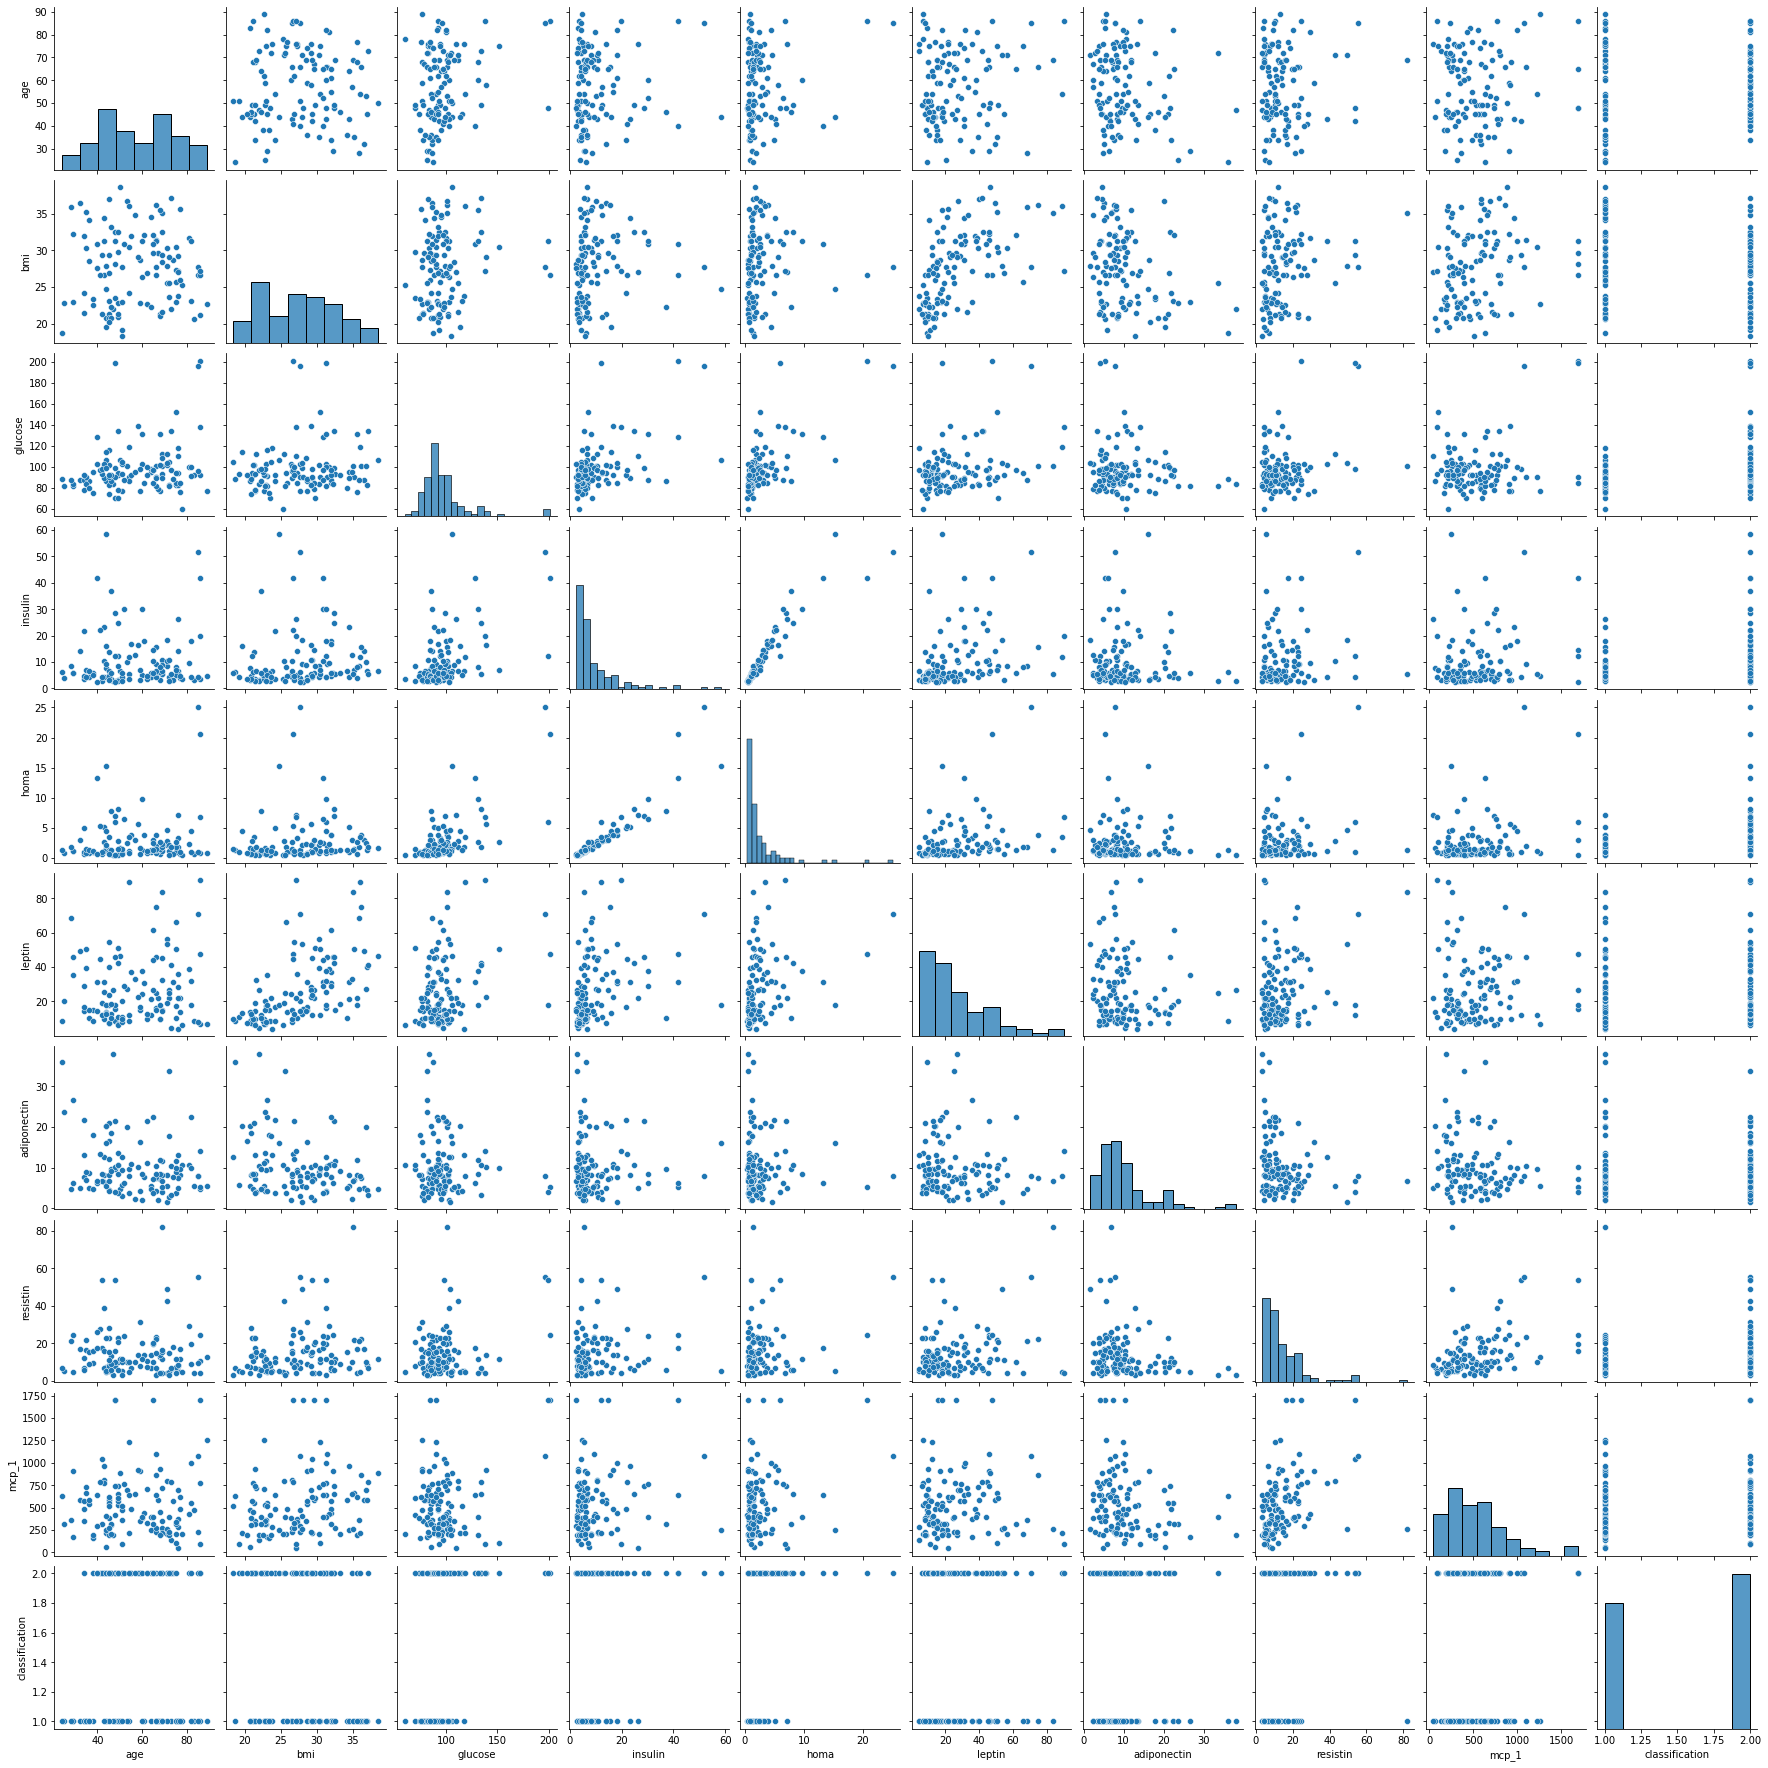

In [4]:
sns.pairplot(data)

In [5]:
# data clean up
data =data[pd.notnull(data[['glucose','insulin','homa']])] 

In [6]:
# describe to data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             0 non-null      float64
 1   bmi             0 non-null      float64
 2   glucose         116 non-null    int64  
 3   insulin         116 non-null    float64
 4   homa            116 non-null    float64
 5   leptin          0 non-null      float64
 6   adiponectin     0 non-null      float64
 7   resistin        0 non-null      float64
 8   mcp_1           0 non-null      float64
 9   classification  0 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 9.2 KB


,count,mean,std,min,25%,50%,75%,max
age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glucose,116.0,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000
insulin,116.0,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000
homa,116.0,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342
leptin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adiponectin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resistin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcp_1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# find columns int and float
colum = data.select_dtypes(include = ["int64","float64"]).keys()
print(colum) 

Index(['age', 'bmi', 'glucose', 'insulin', 'homa', 'leptin', 'adiponectin',
       'resistin', 'mcp_1', 'classification'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadeab9c850>,
      dtype=object)

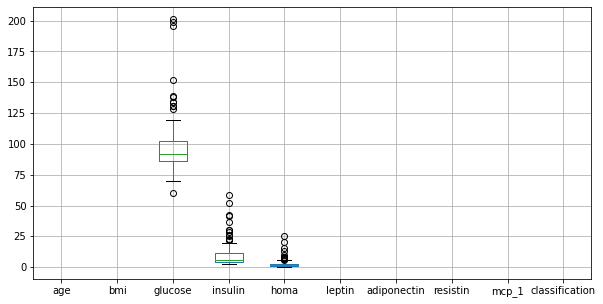

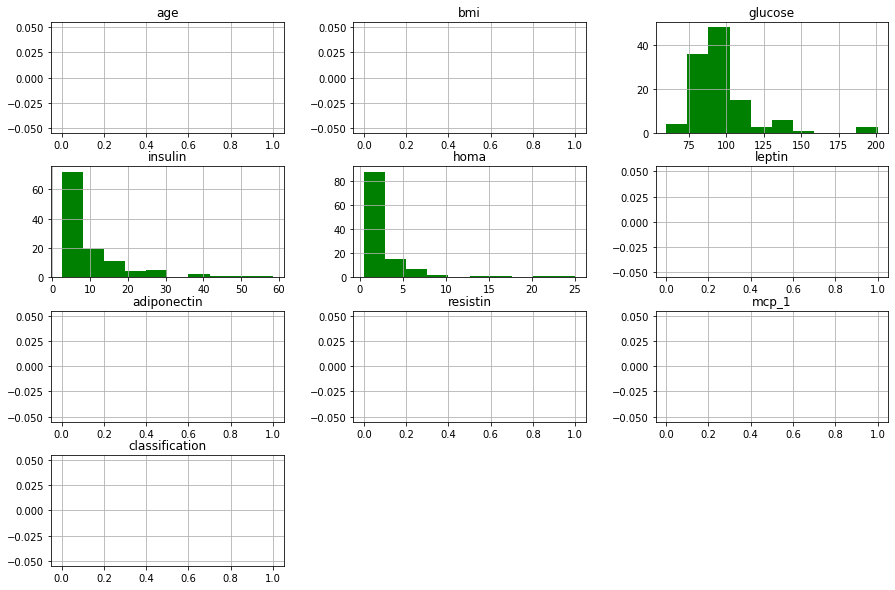

In [8]:
# Draw the columns
rcParams['figure.figsize'] = 10,5
data[colum].boxplot()
rcParams['figure.figsize'] = 15,10
data[colum].hist(color='g')

In [9]:
# normalized
rank_df=data.rank(method='first')
#normalized is subraction from average main on std
normalized_df=(rank_df-rank_df.mean())/rank_df.std()
normalized_df.head(10)# heading to first 10 rows 

,age,bmi,glucose,insulin,homa,leptin,adiponectin,resistin,mcp_1,classification
0,NaN,NaN,-1.680030,-1.620560,-1.709765,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-0.223013,-1.442150,-1.323210,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.252748,-0.698774,-0.698774,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-1.531355,-1.382680,-1.501620,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.193278,-1.115064,-1.025859,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.163543,-1.352945,-1.263740,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,-1.501620,-0.550098,-0.906919,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.352945,0.133808,0.460893,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.341953,-1.293475,-1.055594,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,-1.174535,-0.460893,-0.669039,NaN,NaN,NaN,NaN,NaN


In [10]:
#select number the cluster and default is 8  
for n_cluster in [4,5,6,7,8]:
    kmeans=KMeans(n_clusters=n_cluster).fit(
        normalized_df[['glucose','insulin','homa']])# select the features its effect in living   
    
    silhouette_avg=silhouette_score(
        normalized_df[['glucose','insulin','homa']],
        kmeans.labels_) # edit distances between cluster
    print('Silhouette score for %i Clusters :%0.4f'%(n_cluster,silhouette_avg))

Silhouette score for 4 Clusters :0.3789
Silhouette score for 5 Clusters :0.3737
Silhouette score for 6 Clusters :0.3998
Silhouette score for 7 Clusters :0.3963
Silhouette score for 8 Clusters :0.3947


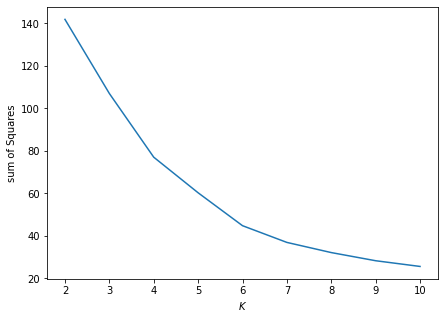

In [11]:
#predict and plot  
sse=[]
krange = list(range(2,11)) #work list starting from 1 and end by 10 and continu by 2
X= normalized_df[['glucose','insulin','homa']].values
for n in krange:
    model=cluster.KMeans(n_clusters=n,random_state=3)
    model.fit_predict(X) # work prediction to model
    cluster_assignments=model.labels_
    centers=model.cluster_centers_
    sse.append(np.sum((X-centers[cluster_assignments])**2))

rcParams['figure.figsize'] = 7,5
plt.plot(krange,sse)
plt.xlabel('$K$')
plt.ylabel('sum of Squares')


plt.show()

In [12]:
kmeans=KMeans(n_clusters=4).fit(normalized_df[['glucose','insulin','homa']]) # select kmeans to normalize or features
four_cluster_df=normalized_df[['glucose','insulin','homa']].copy(deep=True)
four_cluster_df['Cluster']=kmeans.labels_ #add new column and in it number cluster
four_cluster_df.head(10)

,glucose,insulin,homa,Cluster
0,-1.680030,-1.620560,-1.709765,3
1,-0.223013,-1.442150,-1.323210,0
2,-0.252748,-0.698774,-0.698774,0
3,-1.531355,-1.382680,-1.501620,3
4,-0.193278,-1.115064,-1.025859,0
5,-0.163543,-1.352945,-1.263740,0
6,-1.501620,-0.550098,-0.906919,3
7,1.352945,0.133808,0.460893,1
8,0.341953,-1.293475,-1.055594,0
9,-1.174535,-0.460893,-0.669039,3


In [13]:
# select number clusters
cluster0_metrics=kmeans.cluster_centers_[0]
cluster1_metrics=kmeans.cluster_centers_[1]
cluster2_metrics=kmeans.cluster_centers_[2]
cluster3_metrics=kmeans.cluster_centers_[3]

data=[cluster0_metrics,cluster1_metrics,cluster2_metrics,cluster3_metrics]
cluster_center_df=pd.DataFrame(data) # edit cluster center to data freem  
cluster_center_df.colums=four_cluster_df.columns[0:4]
four_cluster_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


,glucose,insulin,homa,Cluster
0,-1.680030,-1.620560,-1.709765,3
1,-0.223013,-1.442150,-1.323210,0
2,-0.252748,-0.698774,-0.698774,0
3,-1.531355,-1.382680,-1.501620,3
4,-0.193278,-1.115064,-1.025859,0
...,...,...,...,...
111,0.014868,-1.323210,-1.174535,0
112,0.669039,-0.639304,-0.431158,0
113,0.431158,-0.133808,-0.044603,0
114,-1.204270,-1.561090,-1.590825,3


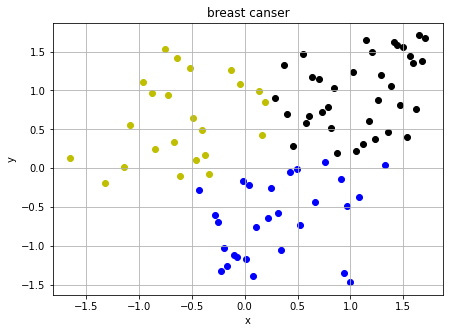

In [14]:
# drawing scatter to column glucose with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')


plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

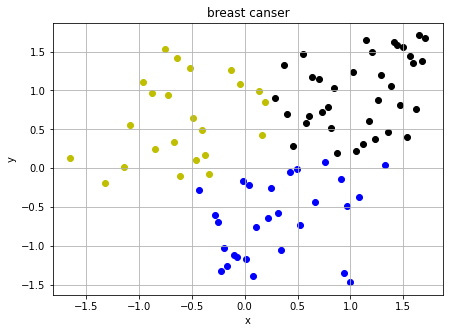

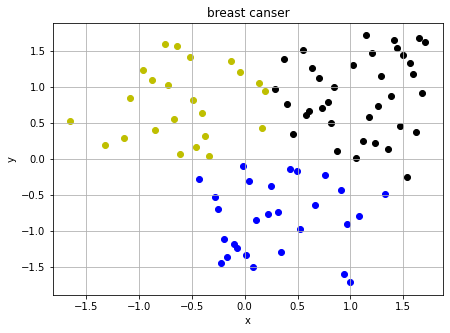

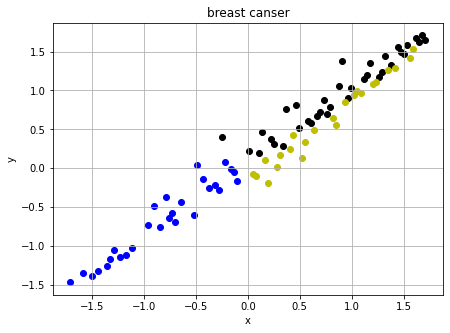

In [15]:
# drawing scatter to column glucose with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# drawing scatter to column glucose with insulin
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['insulin'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['insulin'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['glucose'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['insulin'],
c='y')
plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
# drawing scatter to column insulin with homa
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==0]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==0]['homa'],
c='b')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==1]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==1]['homa'],
c='k')
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster']==2]['insulin'],
four_cluster_df.loc[four_cluster_df['Cluster']==2]['homa'],
c='y')

plt.title('breast canser')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()